<a href="https://colab.research.google.com/github/iamomtiwari/AI/blob/main/HeartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset[1].csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


From those information, we can see which variables are categorical and numerical. So, after this we split the dataset based on those type of variabels to make the analysis easier

In [5]:
# Split the data based on type of variable

cat_feat = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
num_feat = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",
                             "serum_sodium","time"]

For the information,

Notes for categorical data: Anaemia : 0 means that the person does not have anaemia, if 1 it does.

Diabetes : 0 means that the person does not have diabetes, if 1 it does.

High_blood_pressure : 0 means that the person does not have high_blood_pressure, if 1 it does.

Smoking : 0 means that the person does not smoke, if 1 it smokes.

Sex : 0 for female, 1 for male.

DEATH_EVENT : 0 means heart failure is not the cause of the death, if 1 it is.

**Data Preprocessing**
We want to check the quality of the data and clean the data, so the data is ready to be analyzed

In [6]:
# Check missing value

df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# Making the list of column to do for loop in order to see the unique of data
cols = df.columns.tolist()

In [9]:
for col in cols:
  print(f"Unique value pada kolom: {col}")
  print("--------")
  print(df[col].unique())
  print("--------\n")

Unique value pada kolom: age
--------
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
--------

Unique value pada kolom: anaemia
--------
[0 1]
--------

Unique value pada kolom: creatinine_phosphokinase
--------
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082

In [10]:
# See the data duplicated

df.duplicated().sum()

0

Explarotary Data Analysis
After doing the data preparation, now we will do the EDA by visualizating the data and get the insight, to get information from the dataset that is important and selection the feature we will use for modeling

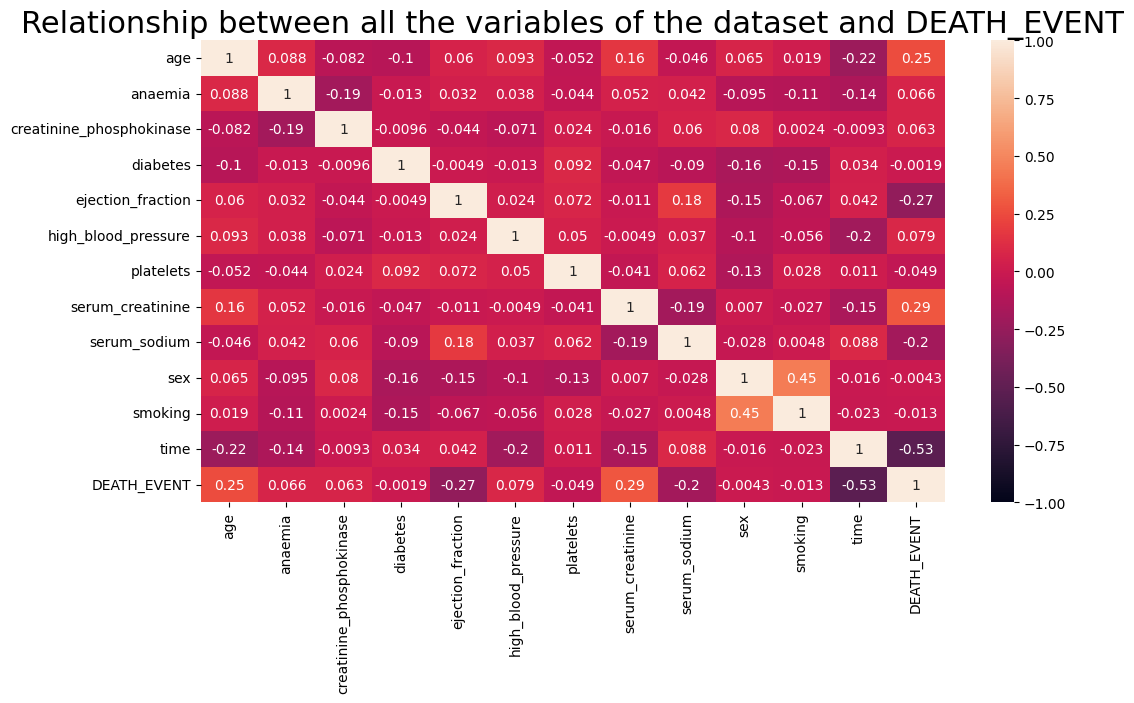

In [11]:
# Correlation of each variables

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 22)
plt.show()

Note : From the correlation matrix above we can see that there is no many variables that has significant correlation to Death_Event (Classification of the death whether it is caused by heart faliure or not).

Variables that has positive correlation are age (0.25) and serum_creatinne (0.29), and the negative one is ejection_fraction (-0.27) and time (-0.53)

